In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import squarify as sq
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [8]:
dataset=pd.read_csv("data/rock_music.csv")
dataset

,name,artist,release_date,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,hit
0,Smells Like Teen Spirit,Nirvana,1991,5.03,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720,1
1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.05,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197,1
2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.91,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228,1
3,Imagine - Remastered 2010,John Lennon,1971,3.13,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169,1
4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.71,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.56,47,0.296,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406,0
5480,Cellophane,King Gizzard & The Lizard Wizard,2014,3.18,44,0.432,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357,0
5481,Hot Water,King Gizzard & The Lizard Wizard,2014,3.40,40,0.627,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734,0
5482,Vitamin C - 2004 Remastered Version,CAN,1972,3.57,52,0.643,0.006690,0.644,0.673000,4,0.1620,-12.615,0.0462,117.225,4,0.853,0


In [3]:
rows, columns = dataset.shape
print(f'Редици: {rows}\nКолони: {columns}')

Редици: 5484
Колони: 17


In [9]:
numerical_columns = ['duration', 'popularity', 'danceability', 
                    'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 
                    'speechiness', 'tempo', 'time_signature', 'valence']

&nbsp;

Дескриптивни статистики

In [10]:
dataset.describe()

,release_date,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,hit
count,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000
mean,1991.196389,4.148361,49.413202,0.511047,0.173019,0.715642,0.076073,5.191284,0.202984,-8.007842,0.057867,125.317722,3.947119,0.556601,0.481400
std,15.331628,1.496276,17.317263,0.147916,0.242596,0.204980,0.196084,3.489761,0.176790,3.534529,0.047112,28.375444,0.290485,0.241503,0.499699
min,1956.000000,0.160000,0.000000,0.000000,0.000001,0.003830,0.000000,0.000000,0.012000,-32.909000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1978.000000,3.300000,40.000000,0.413000,0.003658,0.584000,0.000003,2.000000,0.091400,-10.083750,0.032800,104.362500,4.000000,0.367000,0.000000
50%,1993.000000,3.950000,52.000000,0.515000,0.048400,0.758000,0.000273,5.000000,0.132000,-7.408500,0.042100,123.885000,4.000000,0.561000,0.000000
75%,2004.000000,4.680000,62.000000,0.611000,0.260250,0.885000,0.016800,9.000000,0.269250,-5.308000,0.062900,142.731250,4.000000,0.750250,1.000000
max,2020.000000,24.090000,84.000000,0.987000,0.995000,0.998000,0.993000,11.000000,0.999000,1.949000,0.550000,217.913000,5.000000,0.990000,1.000000


&nbsp;

Missing values

In [6]:
dataset.isna().sum()

name                0
artist              0
release_date        0
duration            0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
valence             0
hit                 0
dtype: int64

&nbsp;

## Outliers

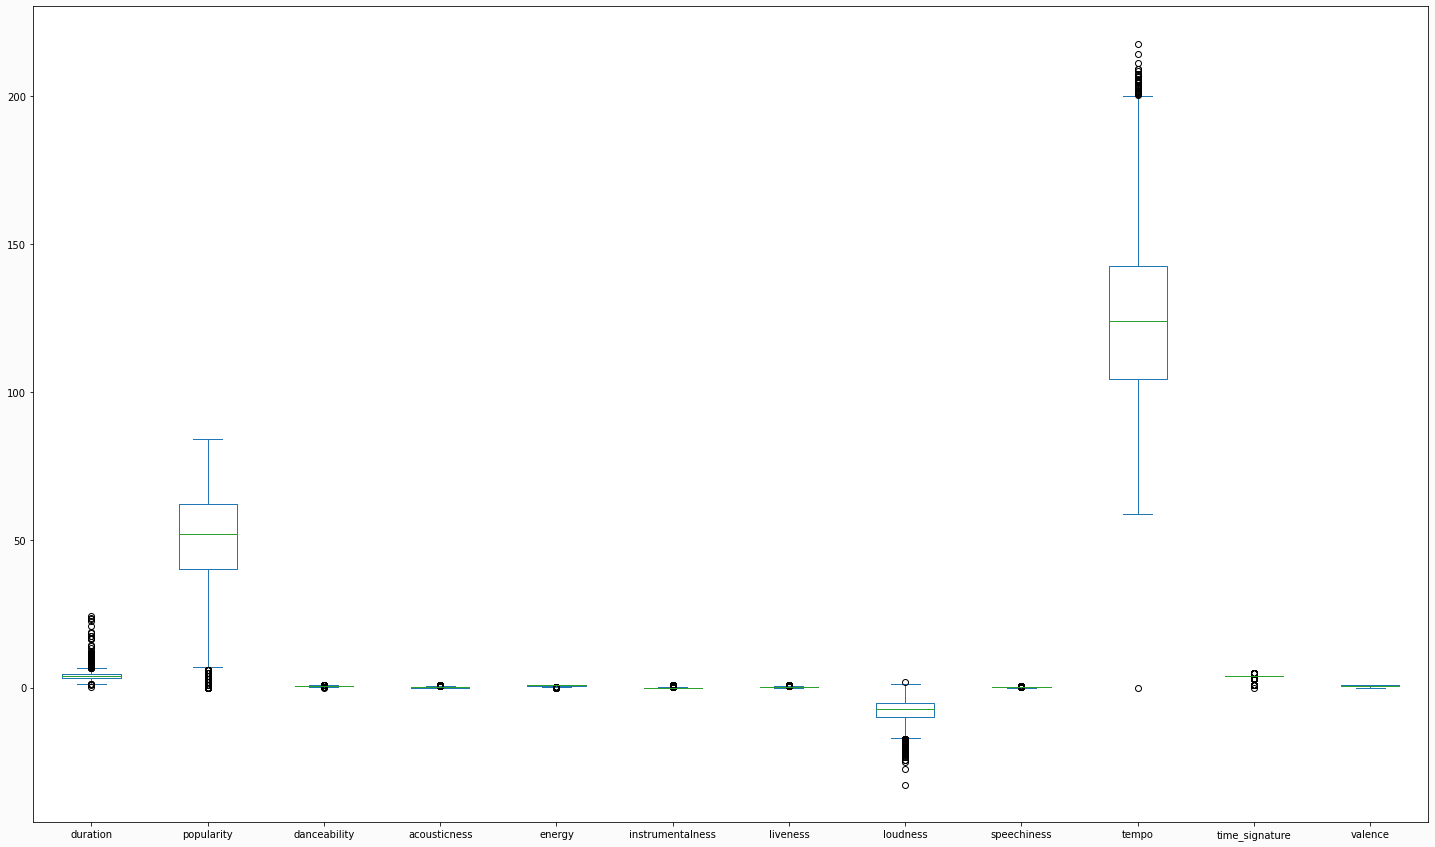

In [20]:
fig = plt.figure(figsize=(25,15))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
dataset[numerical_columns].plot.box(ax=plt.gca())
plt.show()

In [21]:
for column in numerical_columns:
    dataset[(np.abs(stats.zscore(dataset[column])) < 3)].all(axis=1)
    
print(f'Број на записи по отстранувањето на outlierите : {str(dataset.shape[0])}')

Број на записи по отстранувањето на outlierите : 5484


&nbsp;

## Визуелизации

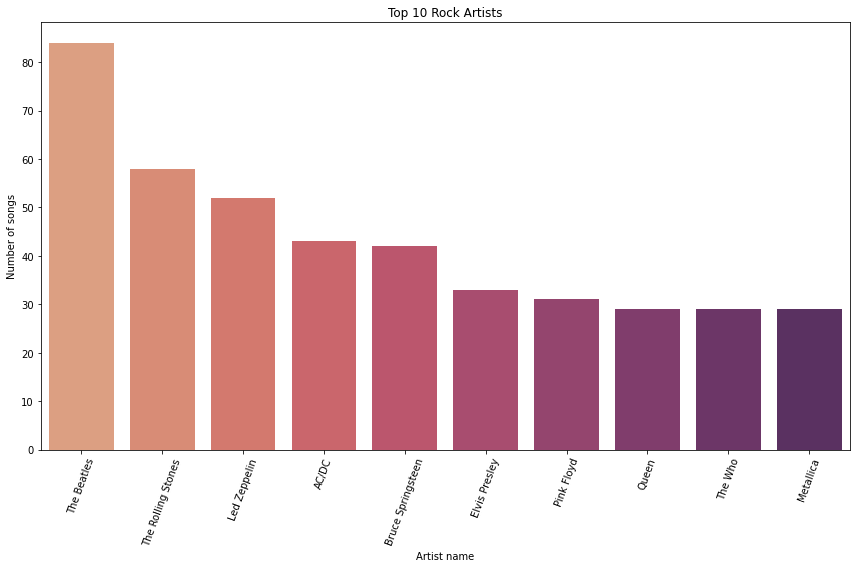

In [23]:
plt.figure(figsize = (12,8))
artist = dataset['artist'].value_counts()[:11].drop(['Various Artists'])
sns.barplot(x=artist.index, y=artist, palette="flare")
plt.xticks(rotation=70)
plt.xlabel('Artist name')
plt.ylabel('Number of songs')
plt.title('Top 10 Rock Artists')
plt.tight_layout()

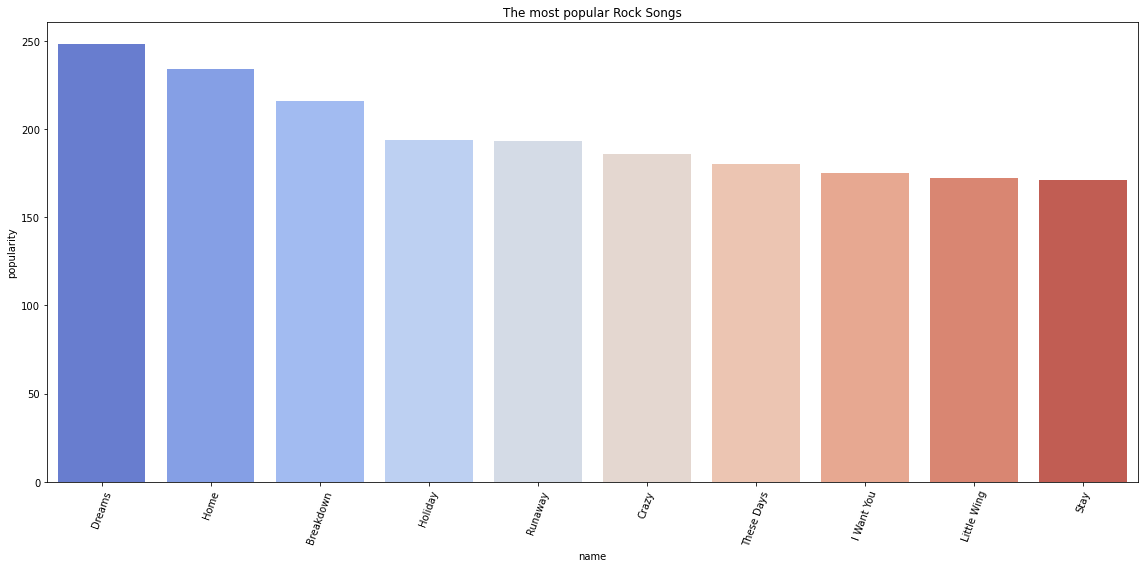

In [24]:
plt.figure(figsize = (16,8))
songs_grouped = dataset.groupby('name')['popularity'].sum().sort_values(ascending=False).head(10)
chart = sns.barplot(x=songs_grouped.index, y=songs_grouped, palette= 'coolwarm')
plt.xticks(rotation=70)
plt.title('The most popular Rock Songs')
plt.tight_layout() 

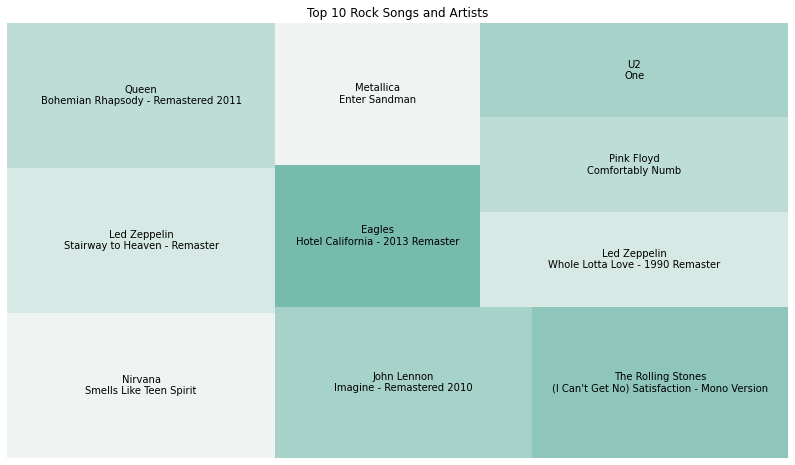

In [27]:
plt.figure(figsize=(14,8))
labels = ["%s\n%s" % (label) for label in zip(dataset.artist, dataset.name)]
sq.plot(sizes=dataset.name.value_counts().head(10), label=labels, alpha=.8, color=sns.color_palette("light:#5A9"))
plt.title('Top 10 Rock Songs and Artists')
plt.axis('off')
plt.show()

&nbsp;

Сите нумерички променливи

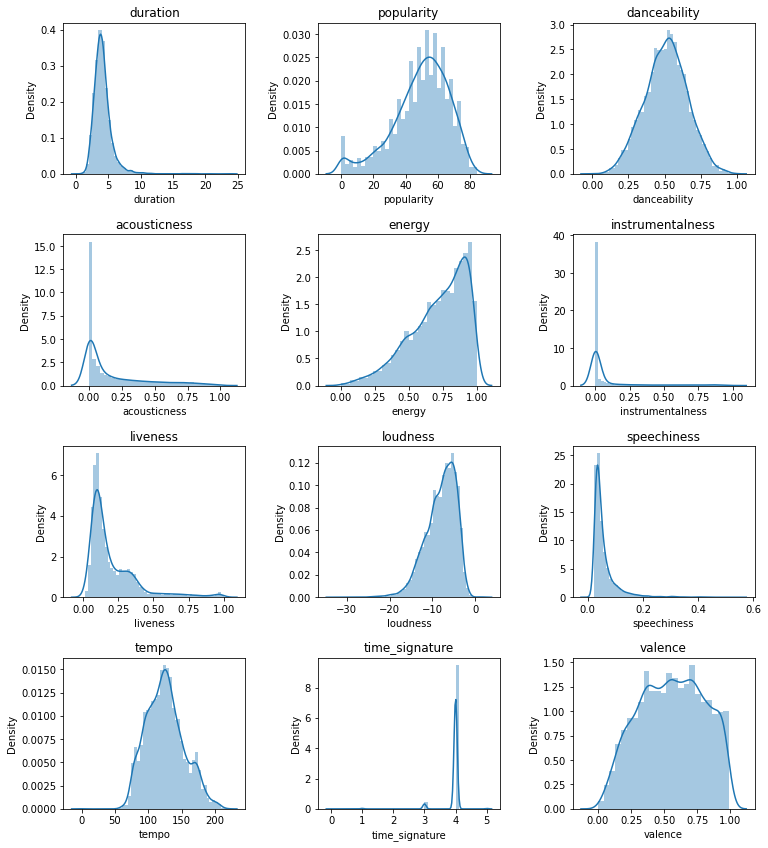

In [28]:
plt.figure(figsize=(12,21))
for i in range(1,len(numerical_columns)+1):
    ax=plt.subplot(6, 3, i)
    sns.distplot(dataset[numerical_columns[i-1]])
    ax.set_title(numerical_columns[i-1])
    
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

&nbsp;

Врска и регресија помеѓу повеќе променливи
- Plot data and a linear regression model fit

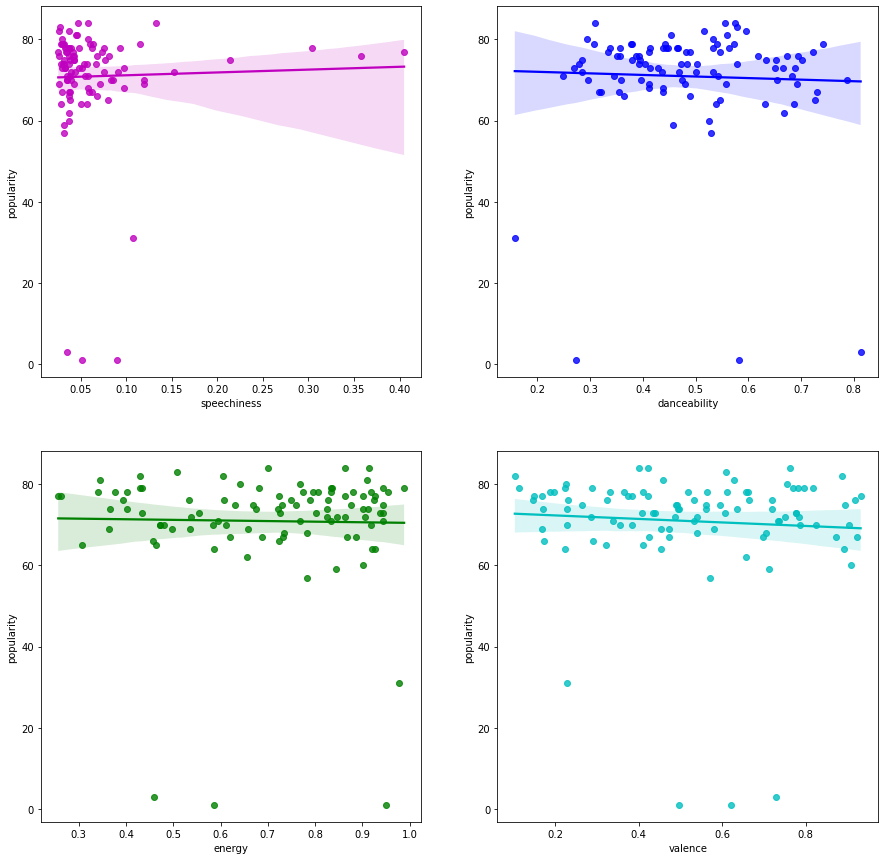

In [29]:
fig,axs = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
sns.regplot(x='danceability', y='popularity', ax=axs[0,1], data=dataset.head(100), color='b')
sns.regplot(x='speechiness', y='popularity', ax=axs[0,0], data=dataset.head(100), color='m')
sns.regplot(x='energy', y='popularity', ax=axs[1,0], data=dataset.head(100), color='g')
sns.regplot(x='valence', y='popularity', ax=axs[1,1], data=dataset.head(100), color='c')
plt.show()

&nbsp;

Зависност помеѓу energy и popularity

<AxesSubplot:title={'center':'Dependence between energy and popularity'}, xlabel='energy', ylabel='popularity'>

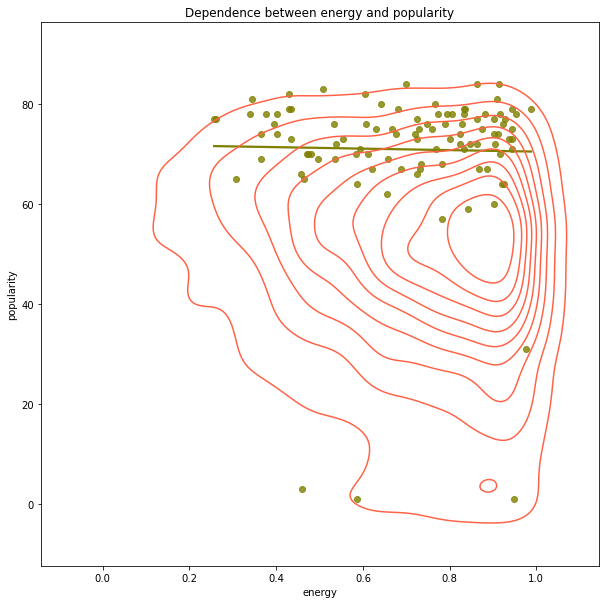

In [30]:
fig=plt.subplots(figsize=(10,10))
plt.title('Dependence between energy and popularity')
sns.regplot(x='energy', y='popularity', ci=None, data=dataset.head(100), color='olive')
sns.kdeplot(dataset.energy, dataset.popularity, color='tomato')

&nbsp;

Пирсонов коефициент на корелација

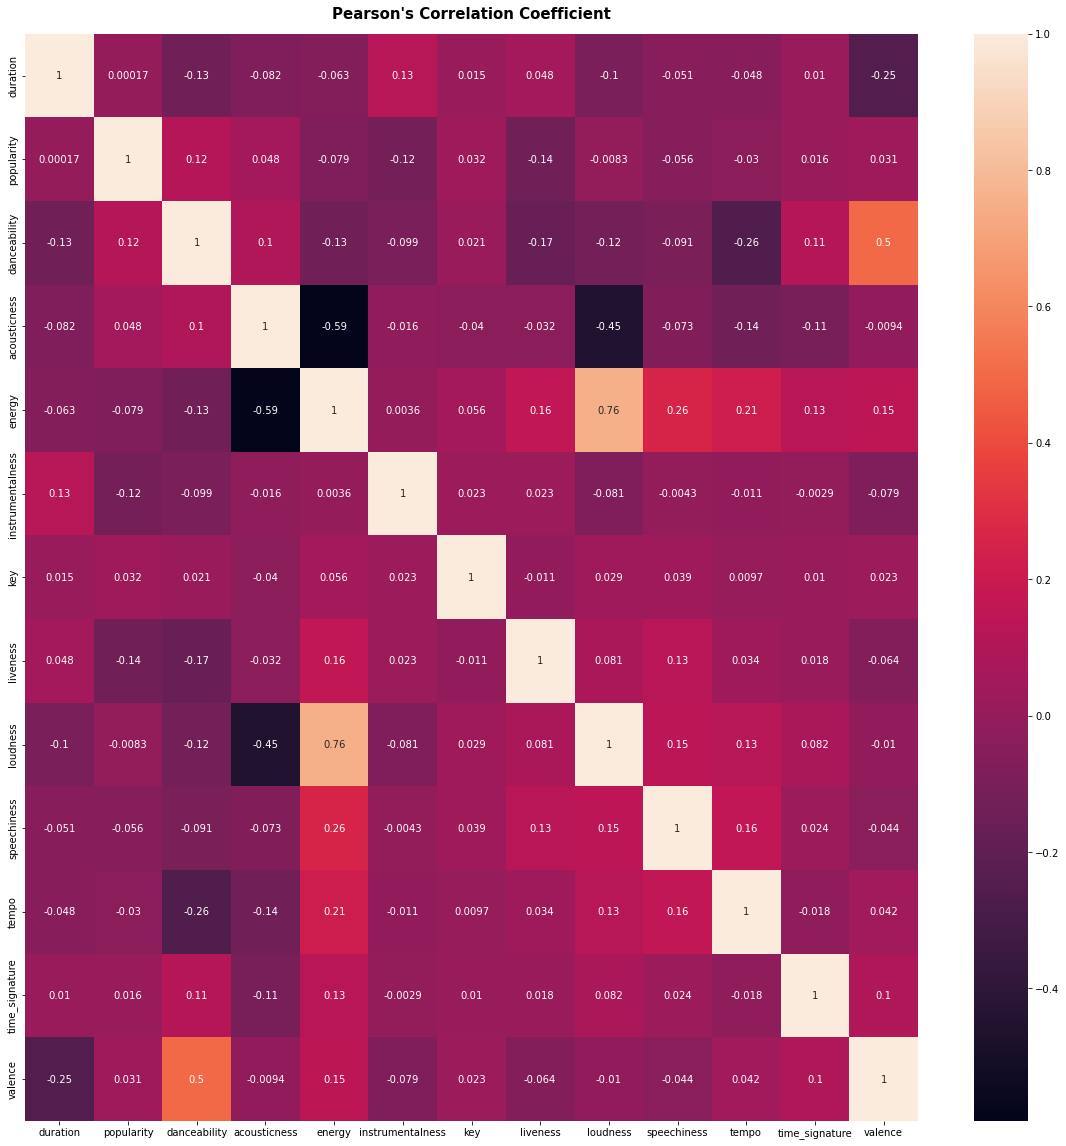

In [31]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(dataset[dataset.columns.drop(['release_date', 'hit'])].corr(), annot=True)
plt.title('Pearson\'s Correlation Coefficient', fontsize=15, fontweight='bold', pad='15.0')
plt.show()

&nbsp;

Спирманов коефициент на корелација

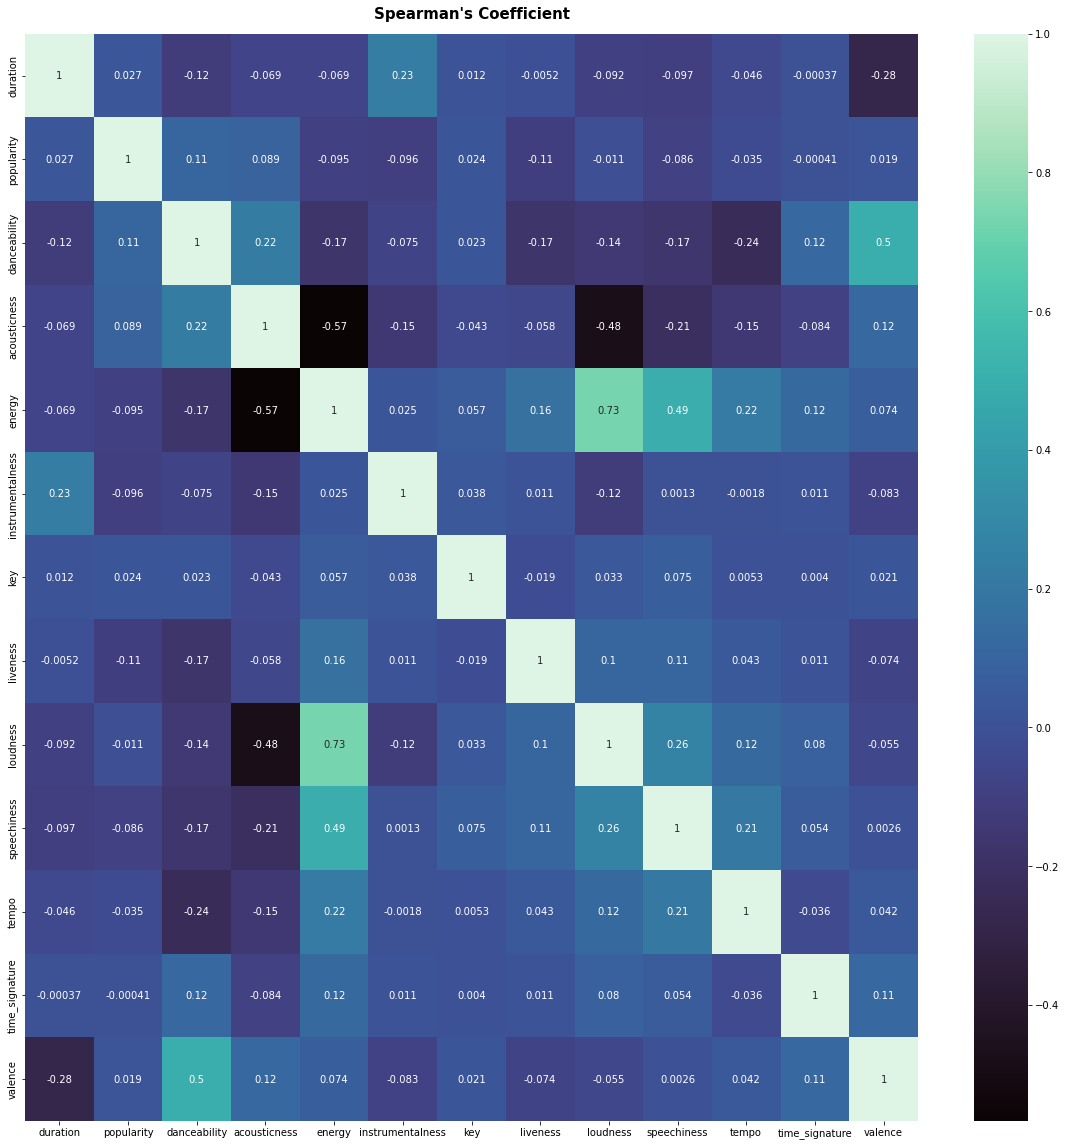

In [32]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(dataset[dataset.columns.drop(['release_date', 'hit'])].corr(method="spearman"), annot=True, cmap='mako')
plt.title('Spearman\'s Coefficient', fontsize=15, fontweight='bold', pad='15.0')
plt.show()

Колоната 'loudness' содржи и позитивни и негативни вредности

&nbsp;

Q-Q Plot

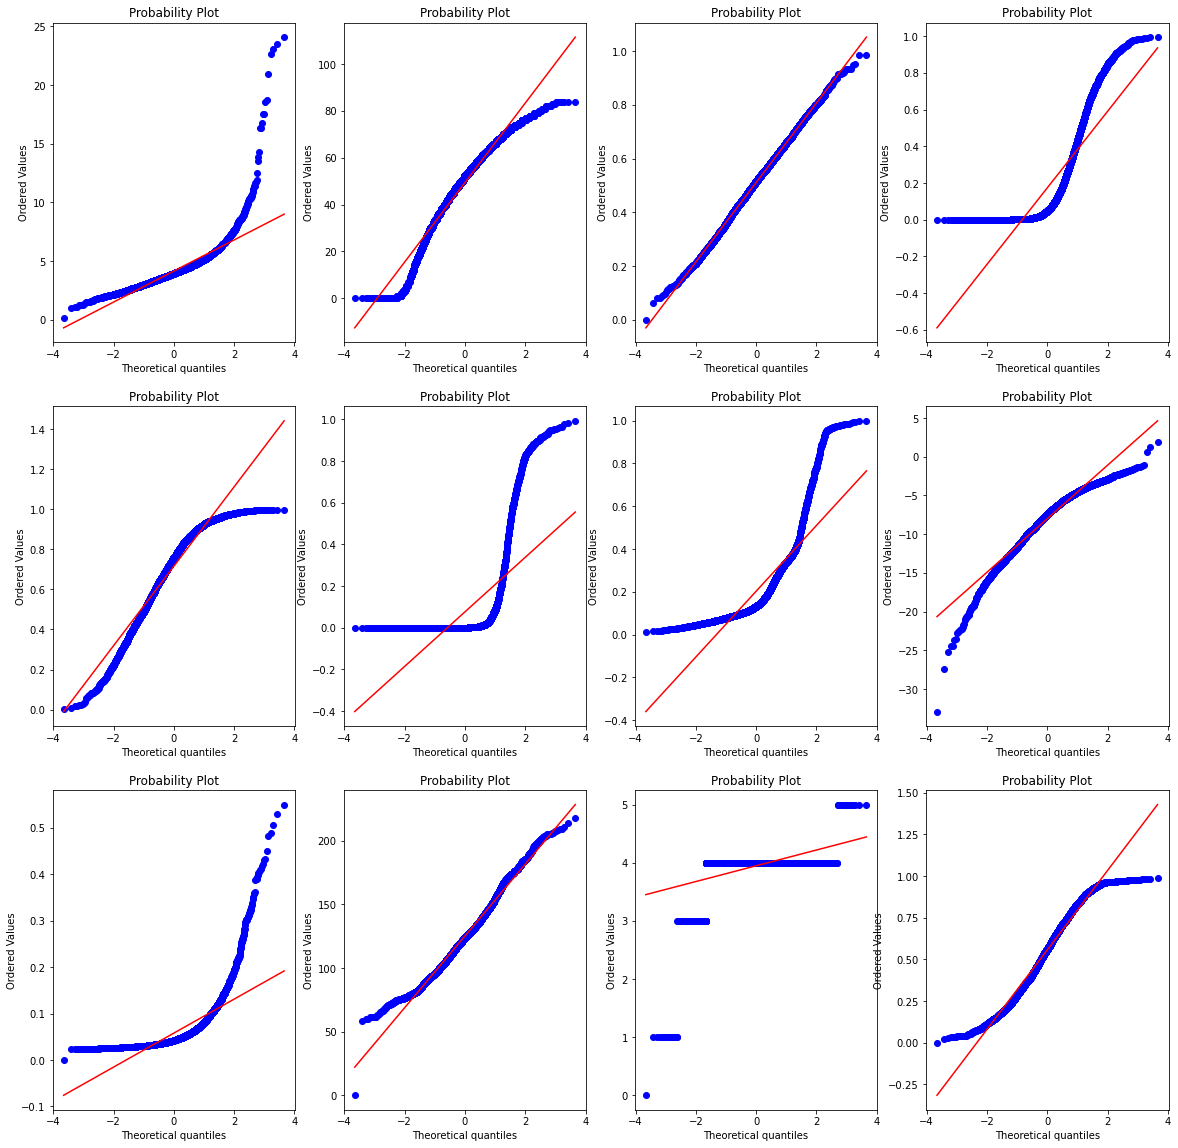

In [33]:
fig = plt.figure(figsize=(20, 20))

for i, feature in enumerate(numerical_columns):
    plt.subplot(3, 4, i+1)
    scipy.stats.probplot(dataset[feature], plot=plt.gca(), dist='norm')

&nbsp;

## Скалирање и енкодирање

In [34]:
scaler = MinMaxScaler()
encoder = LabelEncoder()

In [35]:
dataset_copy = dataset.copy()

In [37]:
dataset_copy['artist'] = encoder.fit_transform(dataset_copy['artist'])

In [39]:
dataset_copy = dataset_copy.set_index('name')

In [40]:
dataset_copy.head(5)

,artist,release_date,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,hit
name,,,,,,,,,,,,,,,,
Smells Like Teen Spirit,942,1991,5.03,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720,1
Stairway to Heaven - Remaster,772,1971,8.05,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197,1
Bohemian Rhapsody - Remastered 2011,1045,1975,5.91,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228,1
Imagine - Remastered 2010,704,1971,3.13,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169,1
(I Can't Get No) Satisfaction - Mono Version,1516,1965,3.71,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931,1


&nbsp;

## Намалување на димензионалноста

In [36]:
pca = PCA()